## Social Media Visualization

### Import Resources

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

### Import your_posts.json to Pandas Dataframe

In [2]:
filename = 'C:\\Users\\Nerph3d\\Downloads\\FACEBOOKDATA_File\\posts\\your_posts.json'
with open(filename) as file:
    dict_ = json.load(file)
df = pd.DataFrame.from_dict(dict_, orient='index')
df.reset_index(level=0, inplace=True)
df.head()

,index,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,96
0,status_updates,"{'timestamp': 1552617836, 'attachments': [], '...","{'timestamp': 1552617783, 'attachments': [], '...","{'timestamp': 1552617660, 'attachments': [], '...","{'timestamp': 1552607068, 'attachments': [{'da...","{'timestamp': 1552099837, 'data': [{'post': 'W...","{'timestamp': 1551601997, 'data': [], 'title':...","{'timestamp': 1551584008, 'attachments': [{'da...","{'timestamp': 1551578166, 'attachments': [{'da...","{'timestamp': 1550972689, 'attachments': [{'da...",...,"{'timestamp': 1527514619, 'attachments': [{'da...","{'timestamp': 1525929643, 'attachments': [{'da...","{'timestamp': 1525183416, 'data': [{'post': 'H...","{'timestamp': 1525138004, 'attachments': [], '...","{'timestamp': 1525027810, 'data': [{'post': 'H...","{'timestamp': 1524871801, 'attachments': [{'da...","{'timestamp': 1521077032, 'attachments': [{'da...","{'timestamp': 1520048366, 'data': [{'post': 'H...","{'timestamp': 1520048344, 'data': [{'post': 'H...","{'timestamp': 1519852626, 'attachments': [{'da..."


### Find timestamps of all comments on your posts

In [3]:
comment_timestamps = list()
for column in df:
    all_posts = dict(df[column])
    for key, value in all_posts.items():
        if isinstance(value,dict):
            for k, v in value.items():
                if k == 'attachments' and len(v) > 0:
                    dict_ = v[0]
                    list_ = dict_['data']
                    dict__ = list_[0]
                    if 'media' in dict__.keys():
                        dict___ = dict__['media']
                        if 'comments' in dict___.keys():
                            list__ = dict___['comments']
                            for comment in list__:
                                comment_timestamps.append(comment['timestamp'])

### Normalize Timestamps

In [4]:
now_timestamp = max(comment_timestamps)
for i in range(len(comment_timestamps)):
    comment_timestamps[i] = now_timestamp - comment_timestamps[i]

### Build data structure to plot

In [5]:
the_past_month = list()
for i in range(60 * 60 * 24 * 30):
    comment_count_now = 0
    for ct in comment_timestamps:
        if ct < i:
            comment_count_now += 1
    the_past_month.append(comment_count_now)

### Plot comment total across past month
#### (assuming the timestamp of the last comment posted = now)

<IPython.core.display.Javascript object>


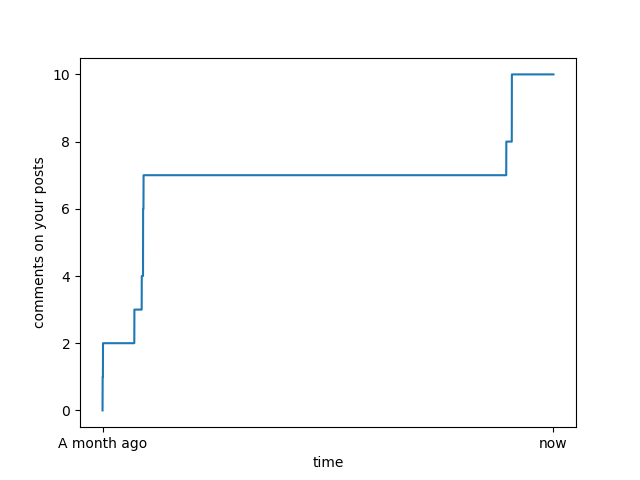

In [6]:
%matplotlib notebook
plt.plot(the_past_month)
plt.xticks([0,(60 * 60 * 24 * 30)], ('A month ago', 'now'))
plt.xlabel("time")
plt.ylabel("comments on your posts")
plt.show()